In [106]:
#!pip install scikit-learn
import sys
!{sys.executable} -m pip install scikit-learn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [107]:
import csv
!pip install scikit-learn
!pip install pandas
!pip install seaborn
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [108]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [109]:
NUM_CLASSES = 12

# 学習データ読み込み

In [110]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [111]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [113]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [114]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 42)                0         
                                                                 
 dense_18 (Dense)            (None, 20)                860       
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
 dense_20 (Dense)            (None, 11)                121       
                                                                 
Total params: 1191 (4.65 KB)
Trainable params: 1191 (4.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [116]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [117]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/54 [..............................] - ETA: 17s - loss: 2.4379 - accuracy: 0.0859
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
54/54 [==============================] - 0s 2ms/step - loss: 2.3639 - accuracy: 0.1256 - val_loss: 2.2349 - val_accuracy: 0.3059
Epoch 2/1000
 1/54 [..............................] - ETA: 0s - loss: 2.2414 - accuracy: 0.2500
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
54/54 [==============================] - 0s 694us/step - loss: 2.1551 - accuracy: 0.2626 - val_loss: 2.0119 - val_accuracy: 0.3204
Epoch 3/1000
 1/54 [..............................] - ETA: 0s - loss: 2.0659 - accuracy: 0.2969
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
54/54 [==============================] - 0s 683us/step - loss: 1.9791 - accuracy: 0.2981 - val_loss: 1.8387 - val_accuracy: 0.3657
Epoch 4/1000
 1/54 [..............................] - ETA: 0s - loss: 1.9669 - accuracy: 0.2812
Epoch 4: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
54/54 [==============================] - 0s 680us/step - loss: 1.4906 - accuracy: 0.4974 - val_loss: 1.2000 - val_accuracy: 0.7618
Epoch 8/1000
 1/54 [..............................] - ETA: 0s - loss: 1.4350 - accuracy: 0.4844
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
54/54 [==============================] - 0s 668us/step - loss: 1.4092 - accuracy: 0.5232 - val_loss: 1.0800 - val_accuracy: 0.7864
Epoch 9/1000
 1/54 [..............................] - ETA: 0s - loss: 1.3752 - accuracy: 0.5391
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
54/54 [==============================] - 0s 670us/step - loss: 1.3405 - accuracy: 0.5539 - val_loss: 0.9727 - val_accuracy: 0.8053
Epoch 10/1000
 1/54 [..............................] - ETA: 0s - loss: 1.2180 - accuracy: 0.6250
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
54/54 [=====

In [118]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

18/18 [==============================] - 0s 326us/step - loss: 0.1769 - accuracy: 0.9556


In [119]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [120]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 19ms/step
[5.0947885e-05 6.4102374e-04 4.9303446e-05 3.3145072e-03 4.1293556e-06
 1.2928072e-03 1.0699050e-02 9.8394370e-01 1.9964133e-07 5.1328886e-08
 4.3210111e-06]
7


# 混同行列


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
72/72 [==============================] - 0s 249us/step


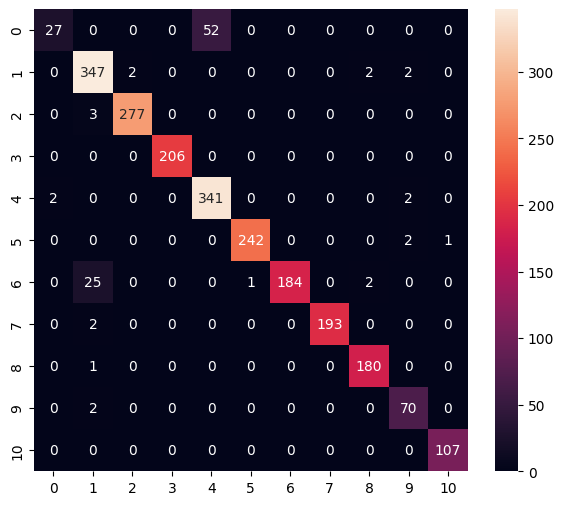

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.34      0.50        79
           1       0.91      0.98      0.95       353
           2       0.99      0.99      0.99       280
           3       1.00      1.00      1.00       206
           4       0.87      0.99      0.92       345
           5       1.00      0.99      0.99       245
           6       1.00      0.87      0.93       212
           7       1.00      0.99      0.99       195
           8       0.98      0.99      0.99       181
           9       0.92      0.97      0.95        72
          10       0.99      1.00      1.00       107

    accuracy                           0.96      2275
   macro avg       0.96      0.92      0.93      2275
weighted avg       0.96      0.96      0.95      2275



In [121]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [122]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [123]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/tmpjh66x1pl/assets


INFO:tensorflow:Assets written to: /var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/tmpjh66x1pl/assets
2024-03-10 22:15:41.886267: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-10 22:15:41.886283: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 6, Total Ops 13, % non-converted = 46.15 %
 * 6 ARITH ops

- arith.constant:    6 occurrences  (f32: 6)



  (f32: 3)
  (f32: 1)


6916

# 推論テスト

In [124]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [125]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [126]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [127]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 50 µs, sys: 28 µs, total: 78 µs
Wall time: 67 µs


In [128]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.0947787e-05 6.4102316e-04 4.9303308e-05 3.3145011e-03 4.1293511e-06
 1.2928053e-03 1.0699039e-02 9.8394370e-01 1.9964078e-07 5.1328794e-08
 4.3210034e-06]
7
